# Name:Nada Hammami

This is my attempt completing the 4th task of the Sparks Foundation tasklist. The goal is to Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.
The purpose is find out the hot zone of terrorism and what all security issues and insights we can derive by EDA.

# The global Terrorism Database

GTD is a publicly accessible database that catalogues information on terrorist attacks worldwide spanning from 1970 to 2017. It encompasses both domestic and international incidents, comprising over 180,000 attacks. Maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), located at the University of Maryland, the GTD serves as a comprehensive resource for studying terrorism trends and patterns over the past decades.

# Characteristics of the Database

-Contains information on over 180,000 terrorist attacks

-Currently the most comprehensive unclassified database on terrorist attacks in the world

-Includes information on more than 88,000 bombings, 19,000 assassinations, and 11,000 kidnappings since 1970

-Includes information on at least 45 variables for each case, with more recent incidents including information on more than 120 variables

-More than 4,000,000 news articles and 25,000 news sources were reviewed to collect incident data from 1998 to 2017 alone

# Importing libraries

In [10]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # creating a wide range of interactive plots with minimal code
import plotly.graph_objects as go # offers a rich set of objects and methods for creating and customizing every aspect of a plot including traces, layouts, axes, annotations...

# Loading the dataset 

In [12]:
# we instruct pandas to use this encoding when reading the CSV file which allows pandas to correctly decode the characters in the file and avoid the UnicodeDecodeError
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')
print('data loaded')


C:\Users\user\AppData\Local\Temp\ipykernel_30696\3696156634.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')


data loaded


In [13]:
data.head()
# here we can't check all columns so we'll do it in the next following step

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Checking all columns names

In [14]:
pd.set_option('display.max_columns',None)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [16]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [17]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [18]:
data.isnull().sum()
# we notice that there are many null values that we have to deal with it later

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

# Rename columns

In [19]:
# we may rename the columns to get better format
# inplace=True ensures that the changes applied to the dataset are permanent
data.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day',
                     'country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType',
                     'target1':'Target','nkill':'Killed','nwound':'Wounded',
                     'summary':'Summary','gname':'Group','targettype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive', 'city': 'City'}, inplace=True)

data['Casualties'] = data['Killed'] + data['Wounded']

# Check if 'Casualties' column exists before selecting columns
required_columns = ['Year', 'Month', 'Day', 'Country', 'state', 'Region', 
                    'City', 'latitude', 'longitude', 'AttackType', 'Killed', 
                    'Wounded', 'Target', 'Summary', 'Group', 'Weapon_type', 
                    'Motive', 'Casualties']

if all(col in data.columns for col in required_columns):
    data = data[required_columns]
    print("Columns selected successfully.")
else:
    missing_columns = [col for col in required_columns if col not in data.columns]
    print(f"Missing columns: {missing_columns}")

Columns selected successfully.


# Filtering the important data from the dataset

In [20]:
data = data[['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'City', 'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary', 'Group', 'Weapon_type', 'Motive', 'Casualties']]


In [21]:
data.head()

,Year,Month,Day,Country,state,Region,City,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Weapon_type,Motive,Casualties
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Incendiary,NaN,NaN


# Missing values

In [22]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
City              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Weapon_type         0
Motive         131130
Casualties      16874
dtype: int64

# Number of terrorist activities in each year

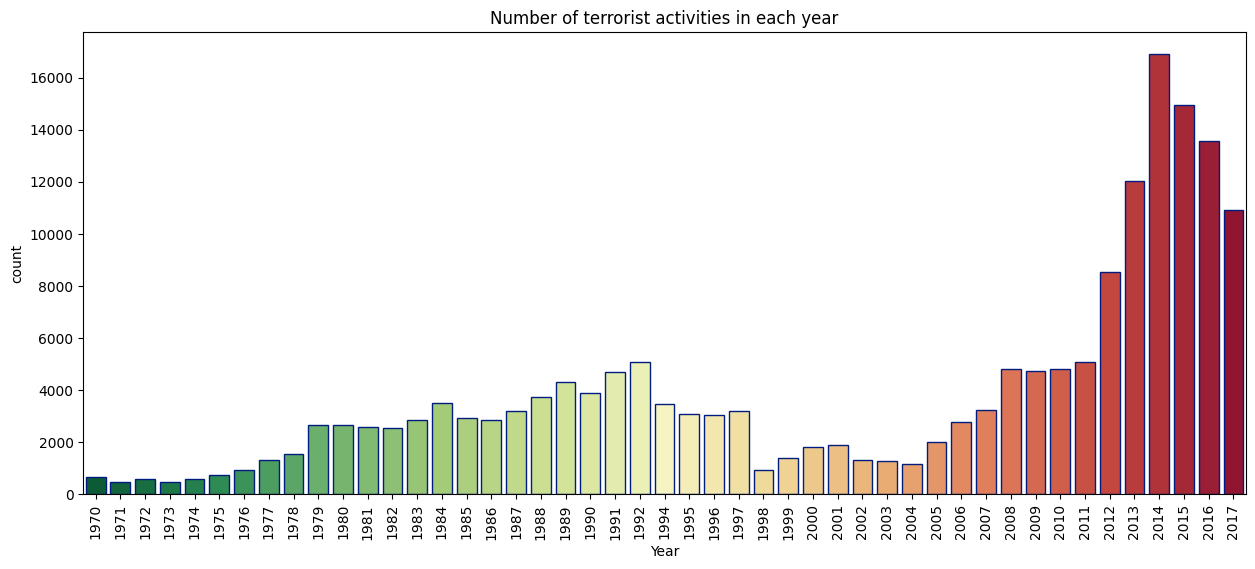

In [23]:
plt.subplots(figsize=(15, 6))
# countplot is a type of bar plot that shows the counts of observations in each category
# 'RdYlGn_r' is a diverging color palette that goes from red to yellow to green in a reversed order
# edgecolor sets the color of the edges of the bars,it uses a dark color palette from Seaborn with 10 shades of dark colors
sns.countplot(x='Year', hue='Year', data=data, palette='RdYlGn_r', edgecolor=sns.color_palette('dark', 10), legend=False)
plt.xticks(rotation=90) # rotation=90 rotates the x-axis vertically 
plt.title('Number of terrorist activities in each year')
plt.show()


# Number of casualities each year

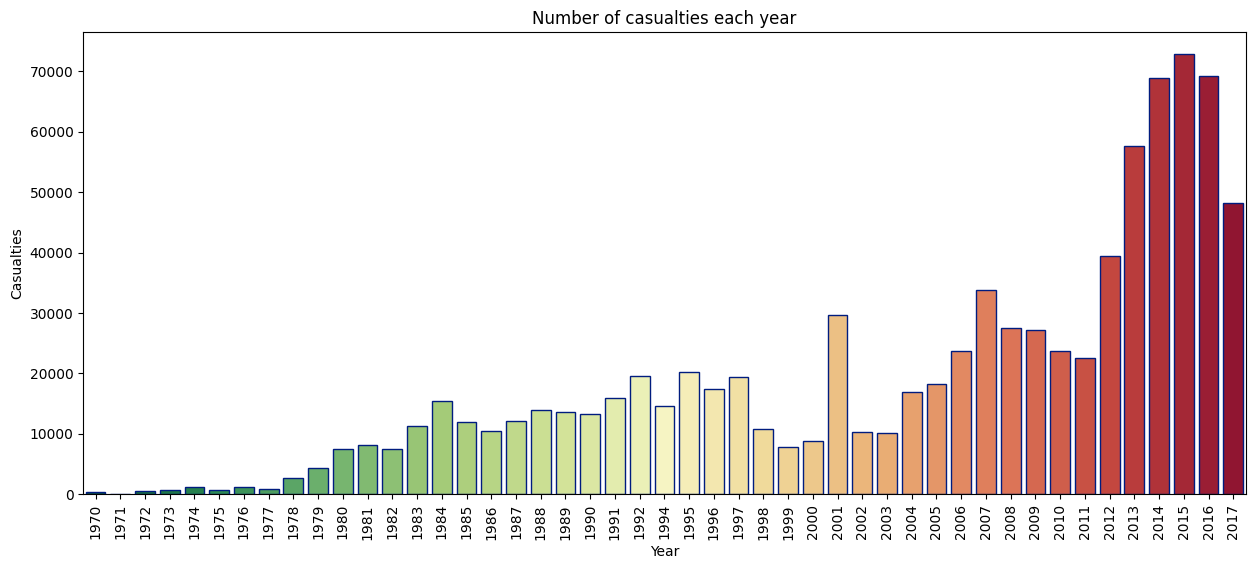

In [24]:
plt.subplots(figsize=(15, 6))
# This line calculates the total number of casualties for each year by grouping the data by the 'Year' column and summing up the 'Casualties' for each group. It then converts the result to a DataFrame using to_frame() and resets the index
year_cas = data.groupby('Year').Casualties.sum().to_frame().reset_index()
# rename the columns of the data 
year_cas.columns = ['Year', 'Casualties']
sns.barplot(x=year_cas.Year, y=year_cas.Casualties, hue=year_cas.Year, palette='RdYlGn_r', edgecolor=sns.color_palette('dark', 10), legend=False)
plt.xticks(rotation=90)
plt.title('Number of casualties each year')
plt.show()



# Number of total attacks in each year

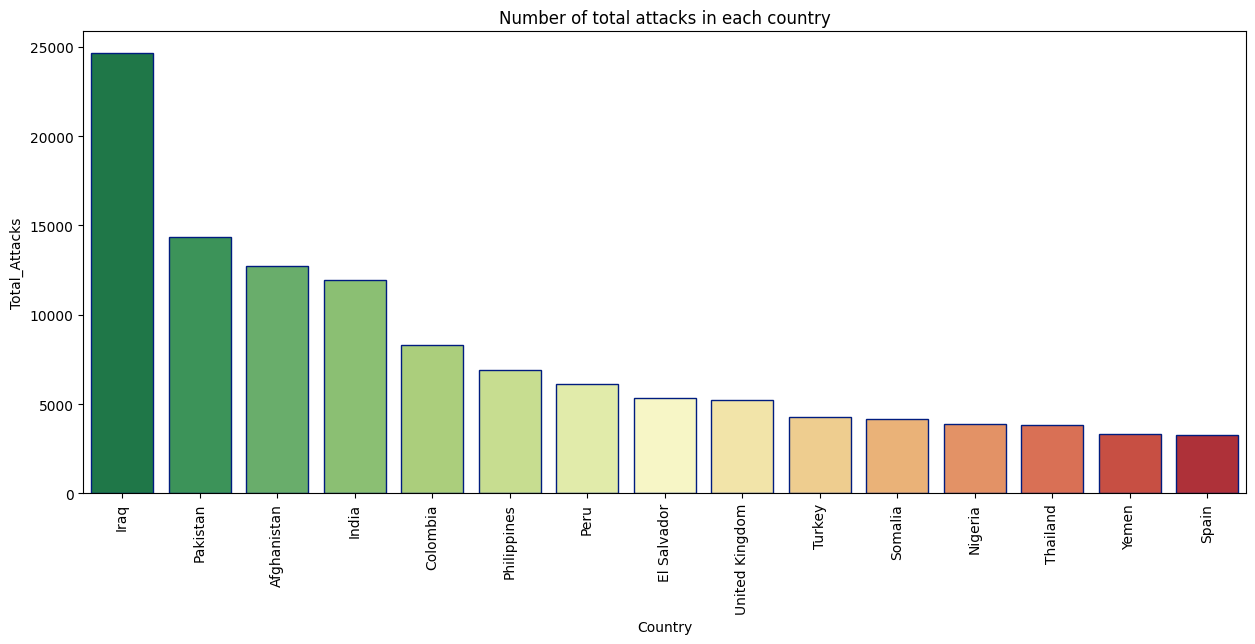

In [25]:
plt.subplots(figsize=(15, 6))
# we'll just show  the 15 countries with the highest number of attacks
country_attacks = data.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total_Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks.Total_Attacks, hue=country_attacks.Country, palette='RdYlGn_r', edgecolor=sns.color_palette('dark', 10), legend=False)
plt.xticks(rotation=90)
plt.title('Number of total attacks in each country')
plt.show()

# Terrorist activities by region in each year

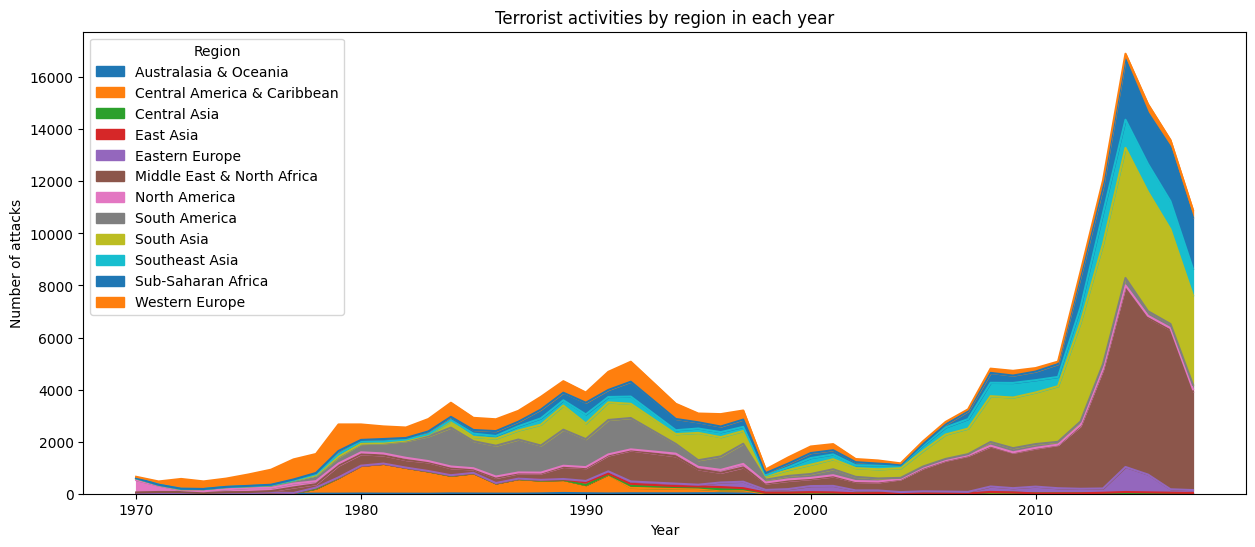

In [26]:
#kind='area': This parameter specifies the type of plot to create
#Cross-tabulation is a method to quantitatively analyze the relationship between multiple variables
pd.crosstab(data.Year,data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activities by region in each year')
plt.ylabel('Number of attacks')
plt.show()

# Top countries affected


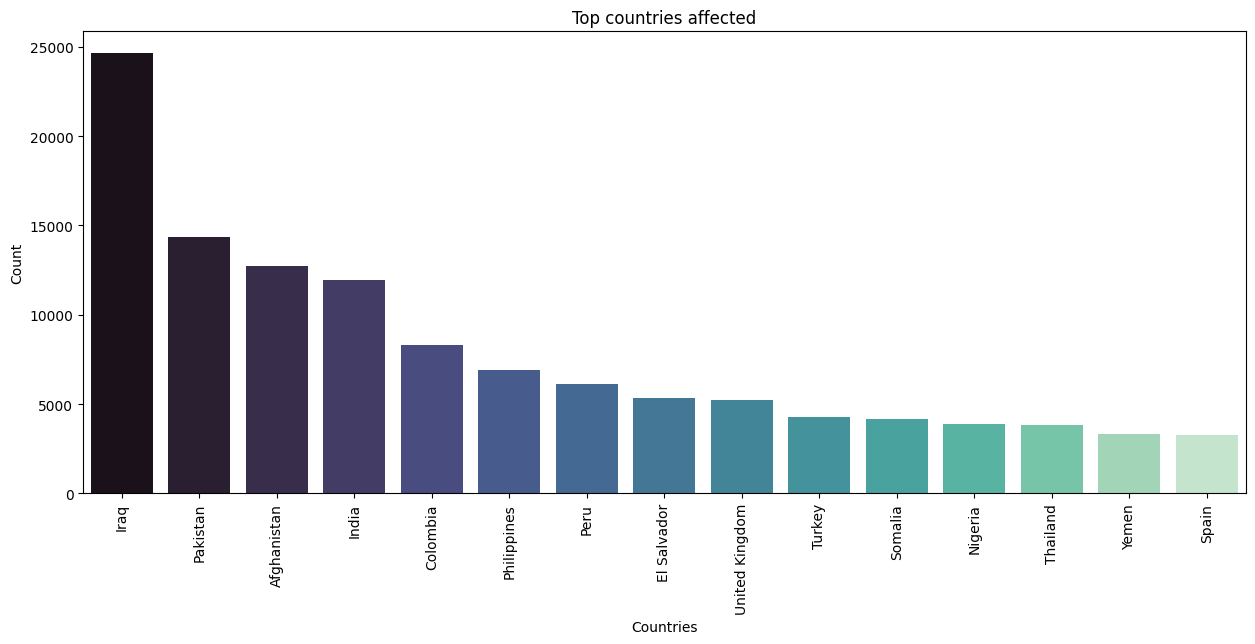

In [27]:
plt.subplots(figsize=(15, 6))
# value_counts is used for sorting
sns.barplot(x=data['Country'].value_counts()[:15].index, y=data['Country'].value_counts()[:15].values, hue=data['Country'].value_counts()[:15].index, palette='mako', legend=False)
plt.title('Top countries affected')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()



# Number of total casualities in each country

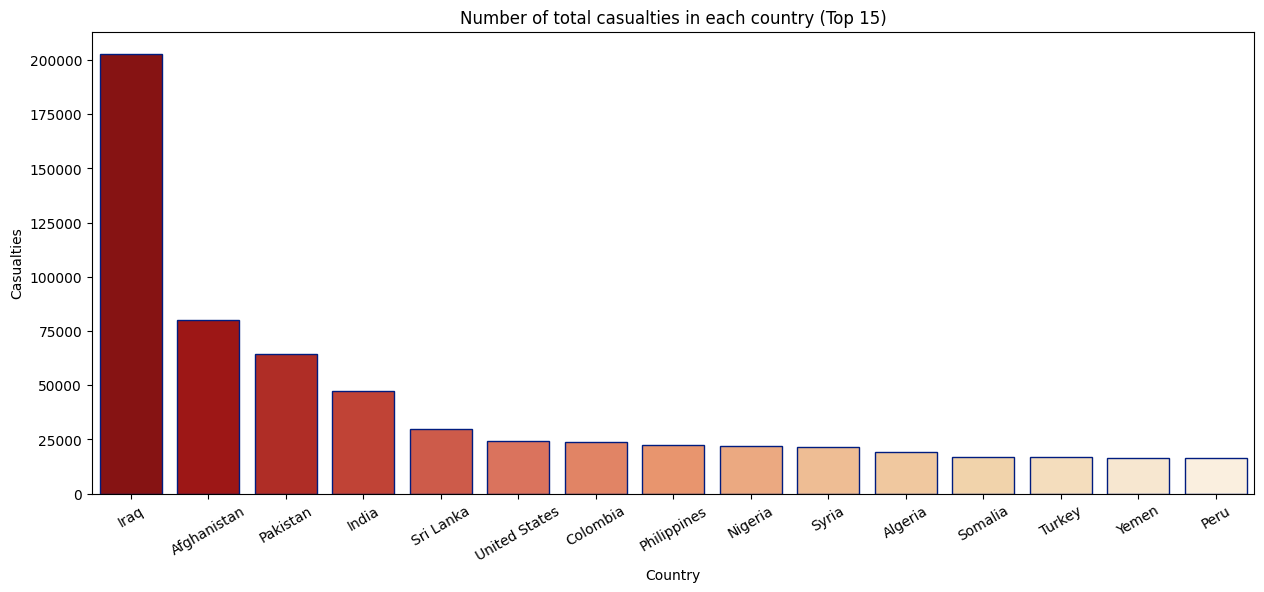

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15, 6))
count_cas = data.groupby('Country').Casualties.sum().to_frame().reset_index().sort_values('Casualties', ascending=False)
count_cas_top15 = count_cas.head(15)  # Selecting the top 15 countries
sns.barplot(x=count_cas_top15.Country, y=count_cas_top15.Casualties, hue=count_cas_top15.Country, palette='OrRd_r', edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=30)
plt.title('Number of total casualties in each country (Top 15)')
plt.show()


# Number of total attacks in each region

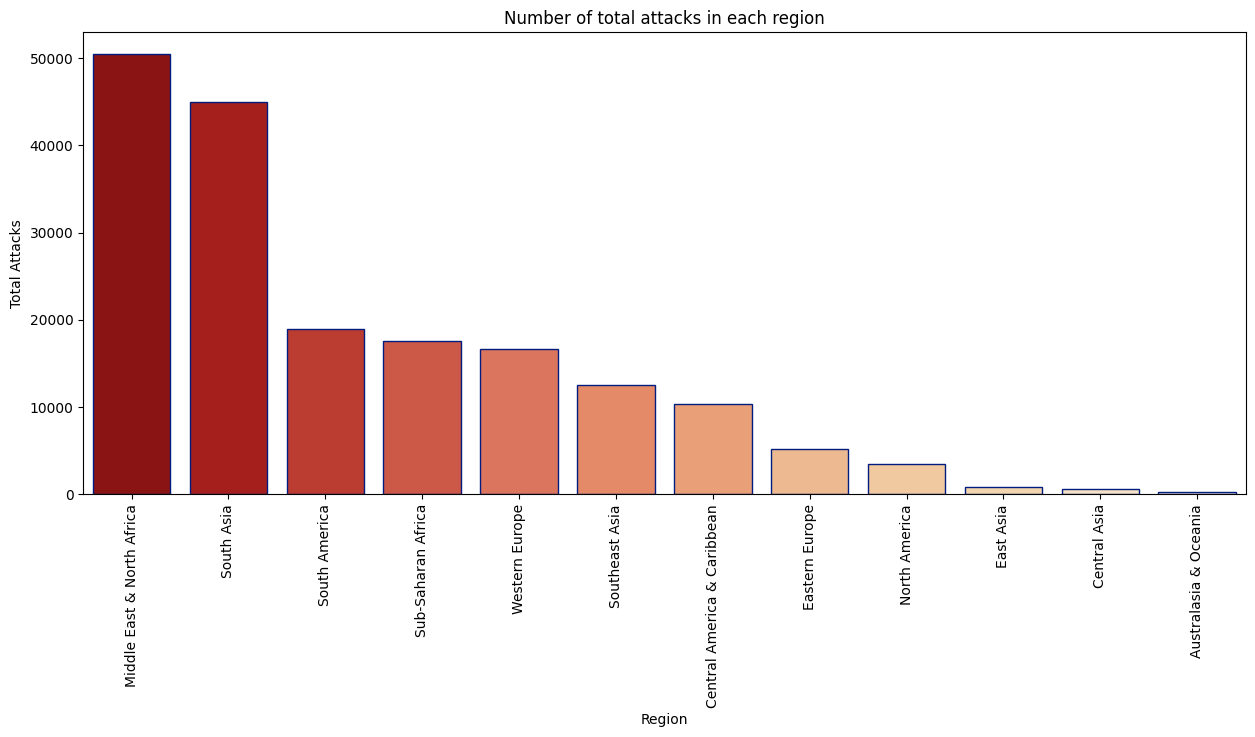

In [37]:
plt.subplots(figsize=(15, 6))
regions_attacks = data.Region.value_counts().to_frame().reset_index()
regions_attacks.columns = ['Region', 'Total Attacks']
sns.barplot(x=regions_attacks.Region, y=regions_attacks['Total Attacks'], hue=regions_attacks.Region, palette='OrRd_r', edgecolor=sns.color_palette('dark', 10), legend=False)
plt.xticks(rotation=90)
plt.title('Number of total attacks in each region')
plt.show()


# Number of total attacks by attack type

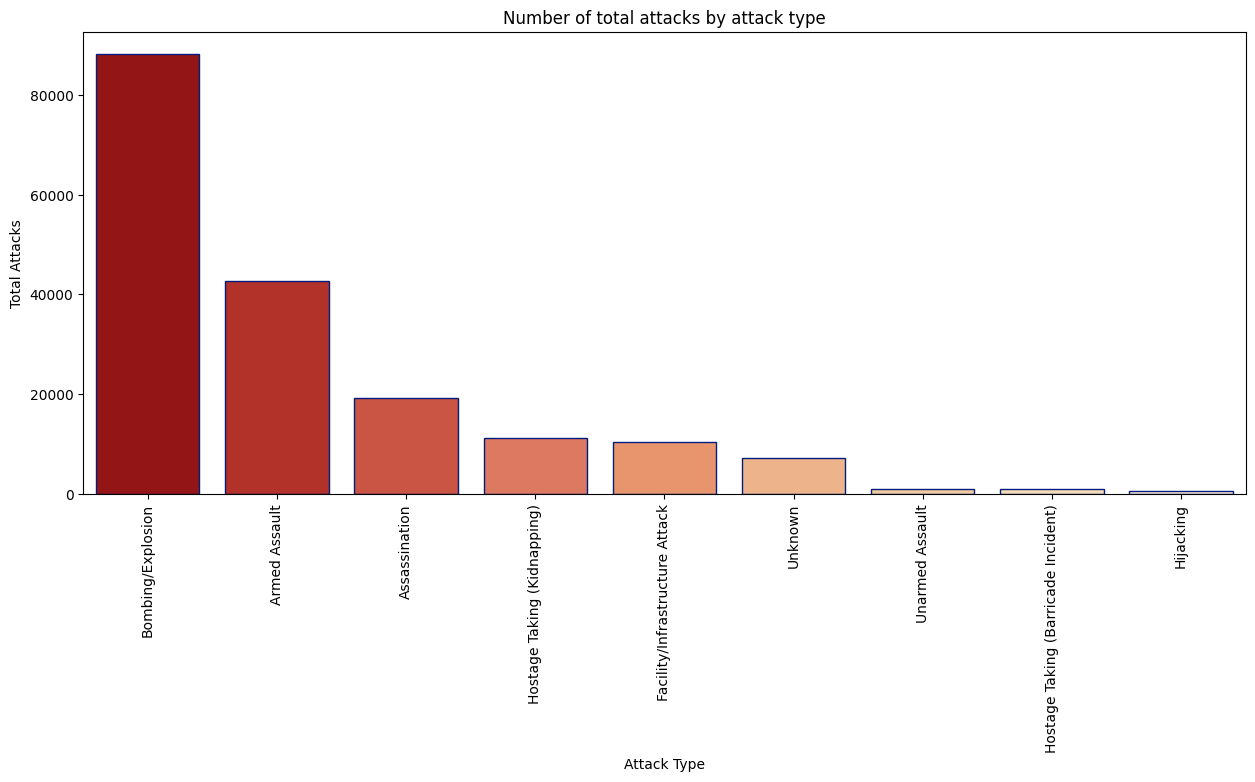

In [38]:
attack_type = data.AttackType.value_counts().to_frame().reset_index()
attack_type.columns = ['Attack Type', 'Total Attacks']

plt.subplots(figsize=(15, 6))
sns.barplot(x=attack_type['Attack Type'], y=attack_type['Total Attacks'], hue=attack_type['Attack Type'], palette='OrRd_r', edgecolor=sns.color_palette('dark', 10), legend=False)
plt.xticks(rotation=90)
plt.title('Number of total attacks by attack type')
plt.show()

# Number of total attacks and casualities by city

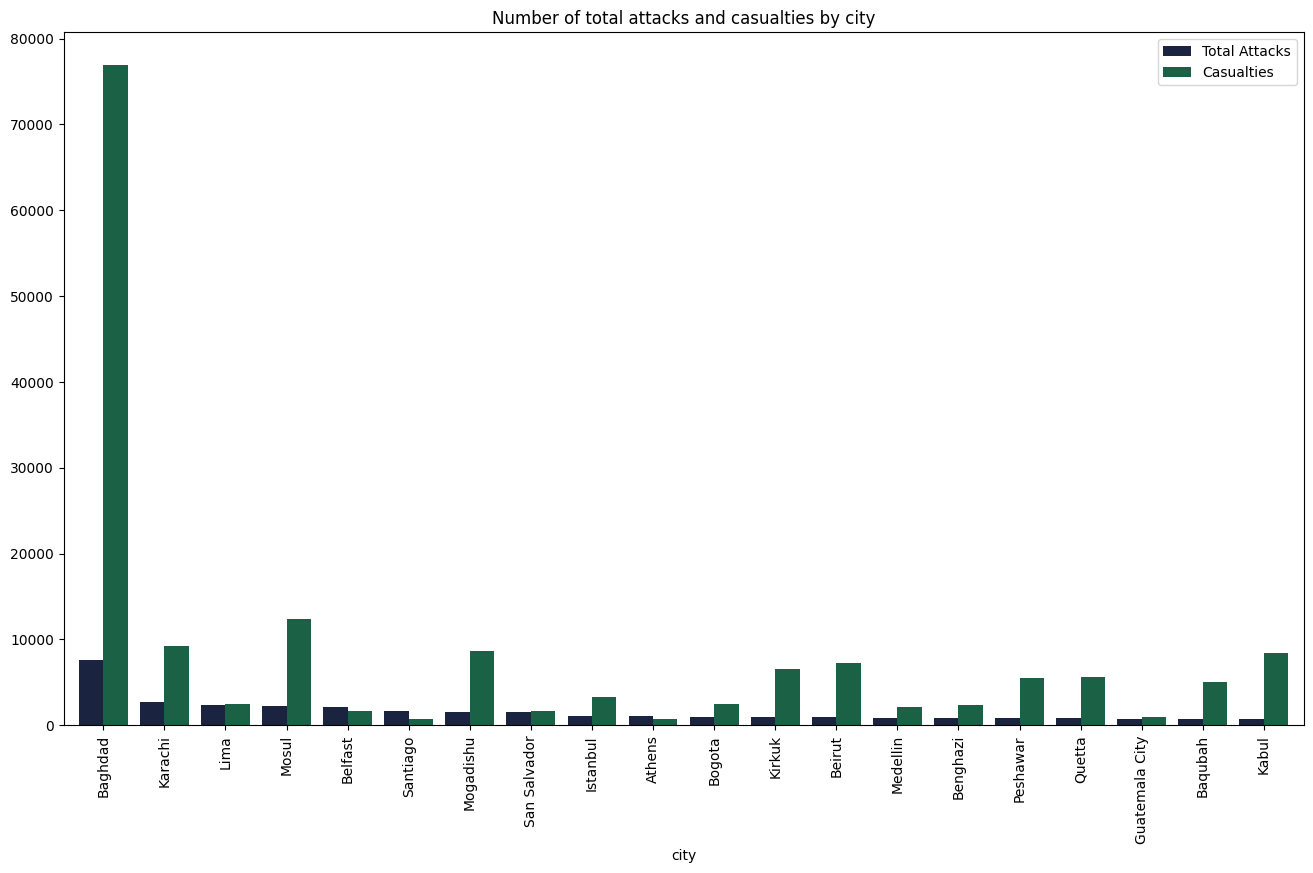

In [39]:
city_attacks = data['City'].value_counts().to_frame().reset_index()
city_attacks.columns = ['city', 'Total Attacks']

city_cas = data.groupby('City')['Casualties'].sum().reset_index()
city_cas.columns = ['city', 'Casualties']
# how determines the type of join to be performed between the two DataFrames
# on means that the merging will be based on the values in the 'city' column of both DataFrames
city_tot = pd.merge(city_attacks, city_cas, how='left', on='city').sort_values('Total Attacks', ascending=False)[1:21]

sns.set_palette('cubehelix')
city_tot.plot.bar(x='city', width=0.8)
plt.xticks(rotation=90)
plt.title('Number of total attacks and casualties by city')
fig = plt.gcf()  # used to get a reference to the current figure so that its size can be adjusted with
fig.set_size_inches(16, 9)
plt.show()


# Total attacks of each terrorist group

In [40]:
# to_frame() converts the resulting series into a dataframe

group_attacks = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist group', 'Total attacks']
group_attacks


,Terrorist group,Total attacks
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


# Number of attacks by terrorist group 

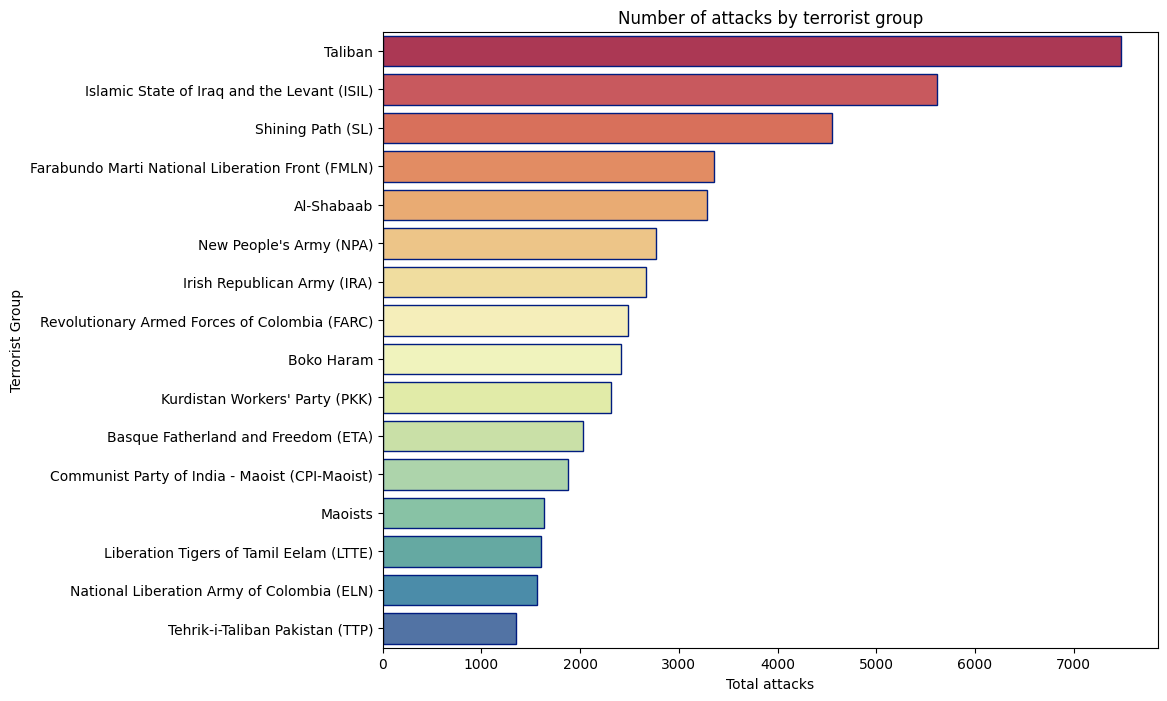

In [41]:
group_attacks = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total attacks']
plt.subplots(figsize=(10, 8))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total attacks'], hue=group_attacks['Terrorist Group'], palette="Spectral", edgecolor=sns.color_palette('dark', 10))
plt.title('Number of attacks by terrorist group')
plt.show()




# Top terrorist activities

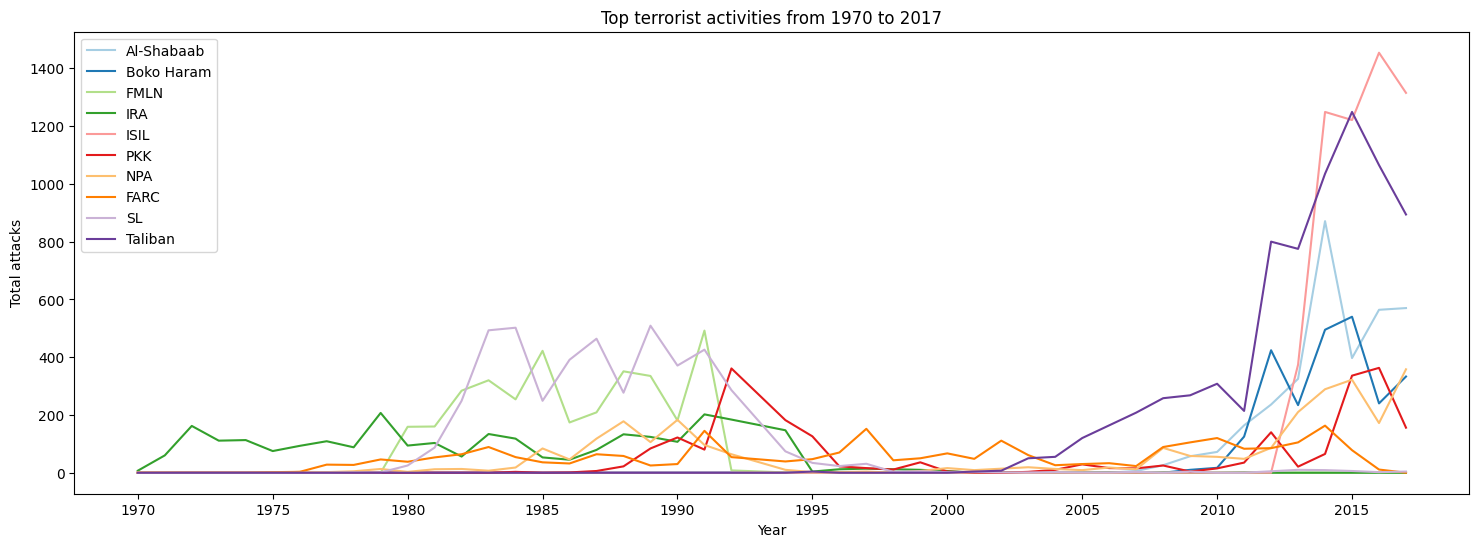

In [42]:
# isin() filters the DataFrame to include only rows where the terrorist group is in the selected top 10 group index 
groups_10 = data[data.Group.isin(data.Group.value_counts()[1:11].index)]
pd.crosstab(groups_10.Year, groups_10.Group).plot(color=sns.color_palette('Paired', 10))

fig = plt.gcf()
fig.set_size_inches(18, 6)
# this line sets the x-axis ticks to be at intervals of 5 years from 1970 to 2017
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total attacks')
plt.title('Top terrorist activities from 1970 to 2017')
plt.legend(labels=['Al-Shabaab', 'Boko Haram', 'FMLN', 'IRA', 'ISIL', 'PKK', 'NPA', 'FARC', 'SL', 'Taliban'], loc='upper left')
plt.show()


# Total number of people killed in terror attacks 

In [43]:
KillData=data.loc[:,'Killed']
print('Number of people killed in terror attacks:',int(sum(KillData.dropna())) )  # we droped the NaN values

Number of people killed in terror attacks: 411868


# Attackdata

In [49]:
KillData = data.loc[:, 'Killed']
attackData = data.loc[:, 'AttackType']
typeKillData = pd.concat([attackData, KillData], axis=1)
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData




AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


# Countrydata

In [55]:
KillData = data.loc[:, 'Killed']
countryData = data.loc[:, 'Country']
countryKillData = pd.concat([countryData, KillData], axis=1)
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData




Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Caledonia,New Hebrides,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Yemen,Norway,Pakistan,Panama,Papua New Guinea,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Rhodesia,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Serbia-Montenegro,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,258.0,1.0,44.0,1244.0,76.0,14.0,79.0,3.0,0.0,9.0,42.0,79.0,11.0,203.0,0.0,28.0,134.0,4205.0,543.0,2347.0,365.0,1990.0,1119.0,228.0,1008.0,14698.0,1.0,17.0,248.0,8.0,45.0,6.0,27.0,4069.0,5.0,274.0,3.0,34.0,2.0,9.0,54.0,3869.0,12053.0,2.0,46.0,3.0,1765.0,0.0,8.0,11.0,534.0,1.0,0.0,6.0,13.0,278.0,84.0,19.0,325.0,9.0,8.0,5167.0,213.0,17.0,41.0,336.0,307.0,4.0,6.0,0.0,19341.0,1238.0,1.0,1673.0,78589.0,117.0,1703.0,420.0,268.0,42.0,66.0,133.0,39.0,1948.0,83.0,63.0,10.0,27.0,2.0,4061.0,46.0,177.0,2598.0,1.0,0.0,1.0,49.0,31.0,33.0,152.0,20.0,1432.0,5.0,0.0,43.0,0.0,780.0,13.0,1.0,292.0,2711.0,1280.0,220.0,1969.0,37.0,35.0,0.0,1.0,10598.0,1474.0,22682.0,3.0,3.0,79.0,23822.0,38.0,79.0,59.0,15.0,12771.0,9559.0,9.0,32.0,7.0,182.0,217.0,4.0,4308.0,3236.0,672.0,325.0,3.0,3.0,0.0,840.0,5.0,7.0,1.0,4.0,10273.0,2674.0,10.0,2634.0,81.0,0.0,96.0,1288.0,15530.0,0.0,2.0,3883.0,29.0,6.0,22.0,74.0,15229.0,60.0,307.0,73.0,2742.0,76.0,6.0,351.0,6888.0,3.0,3065.0,2261.0,123.0,3410.0,3771.0,6.0,68.0,0.0,0.0,227.0,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


# Number of people killed by countries


In [57]:
# plot dimensions=25*25
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 25
fig_size[1] = 25
plt.rcParams['figure.figsize'] = fig_size



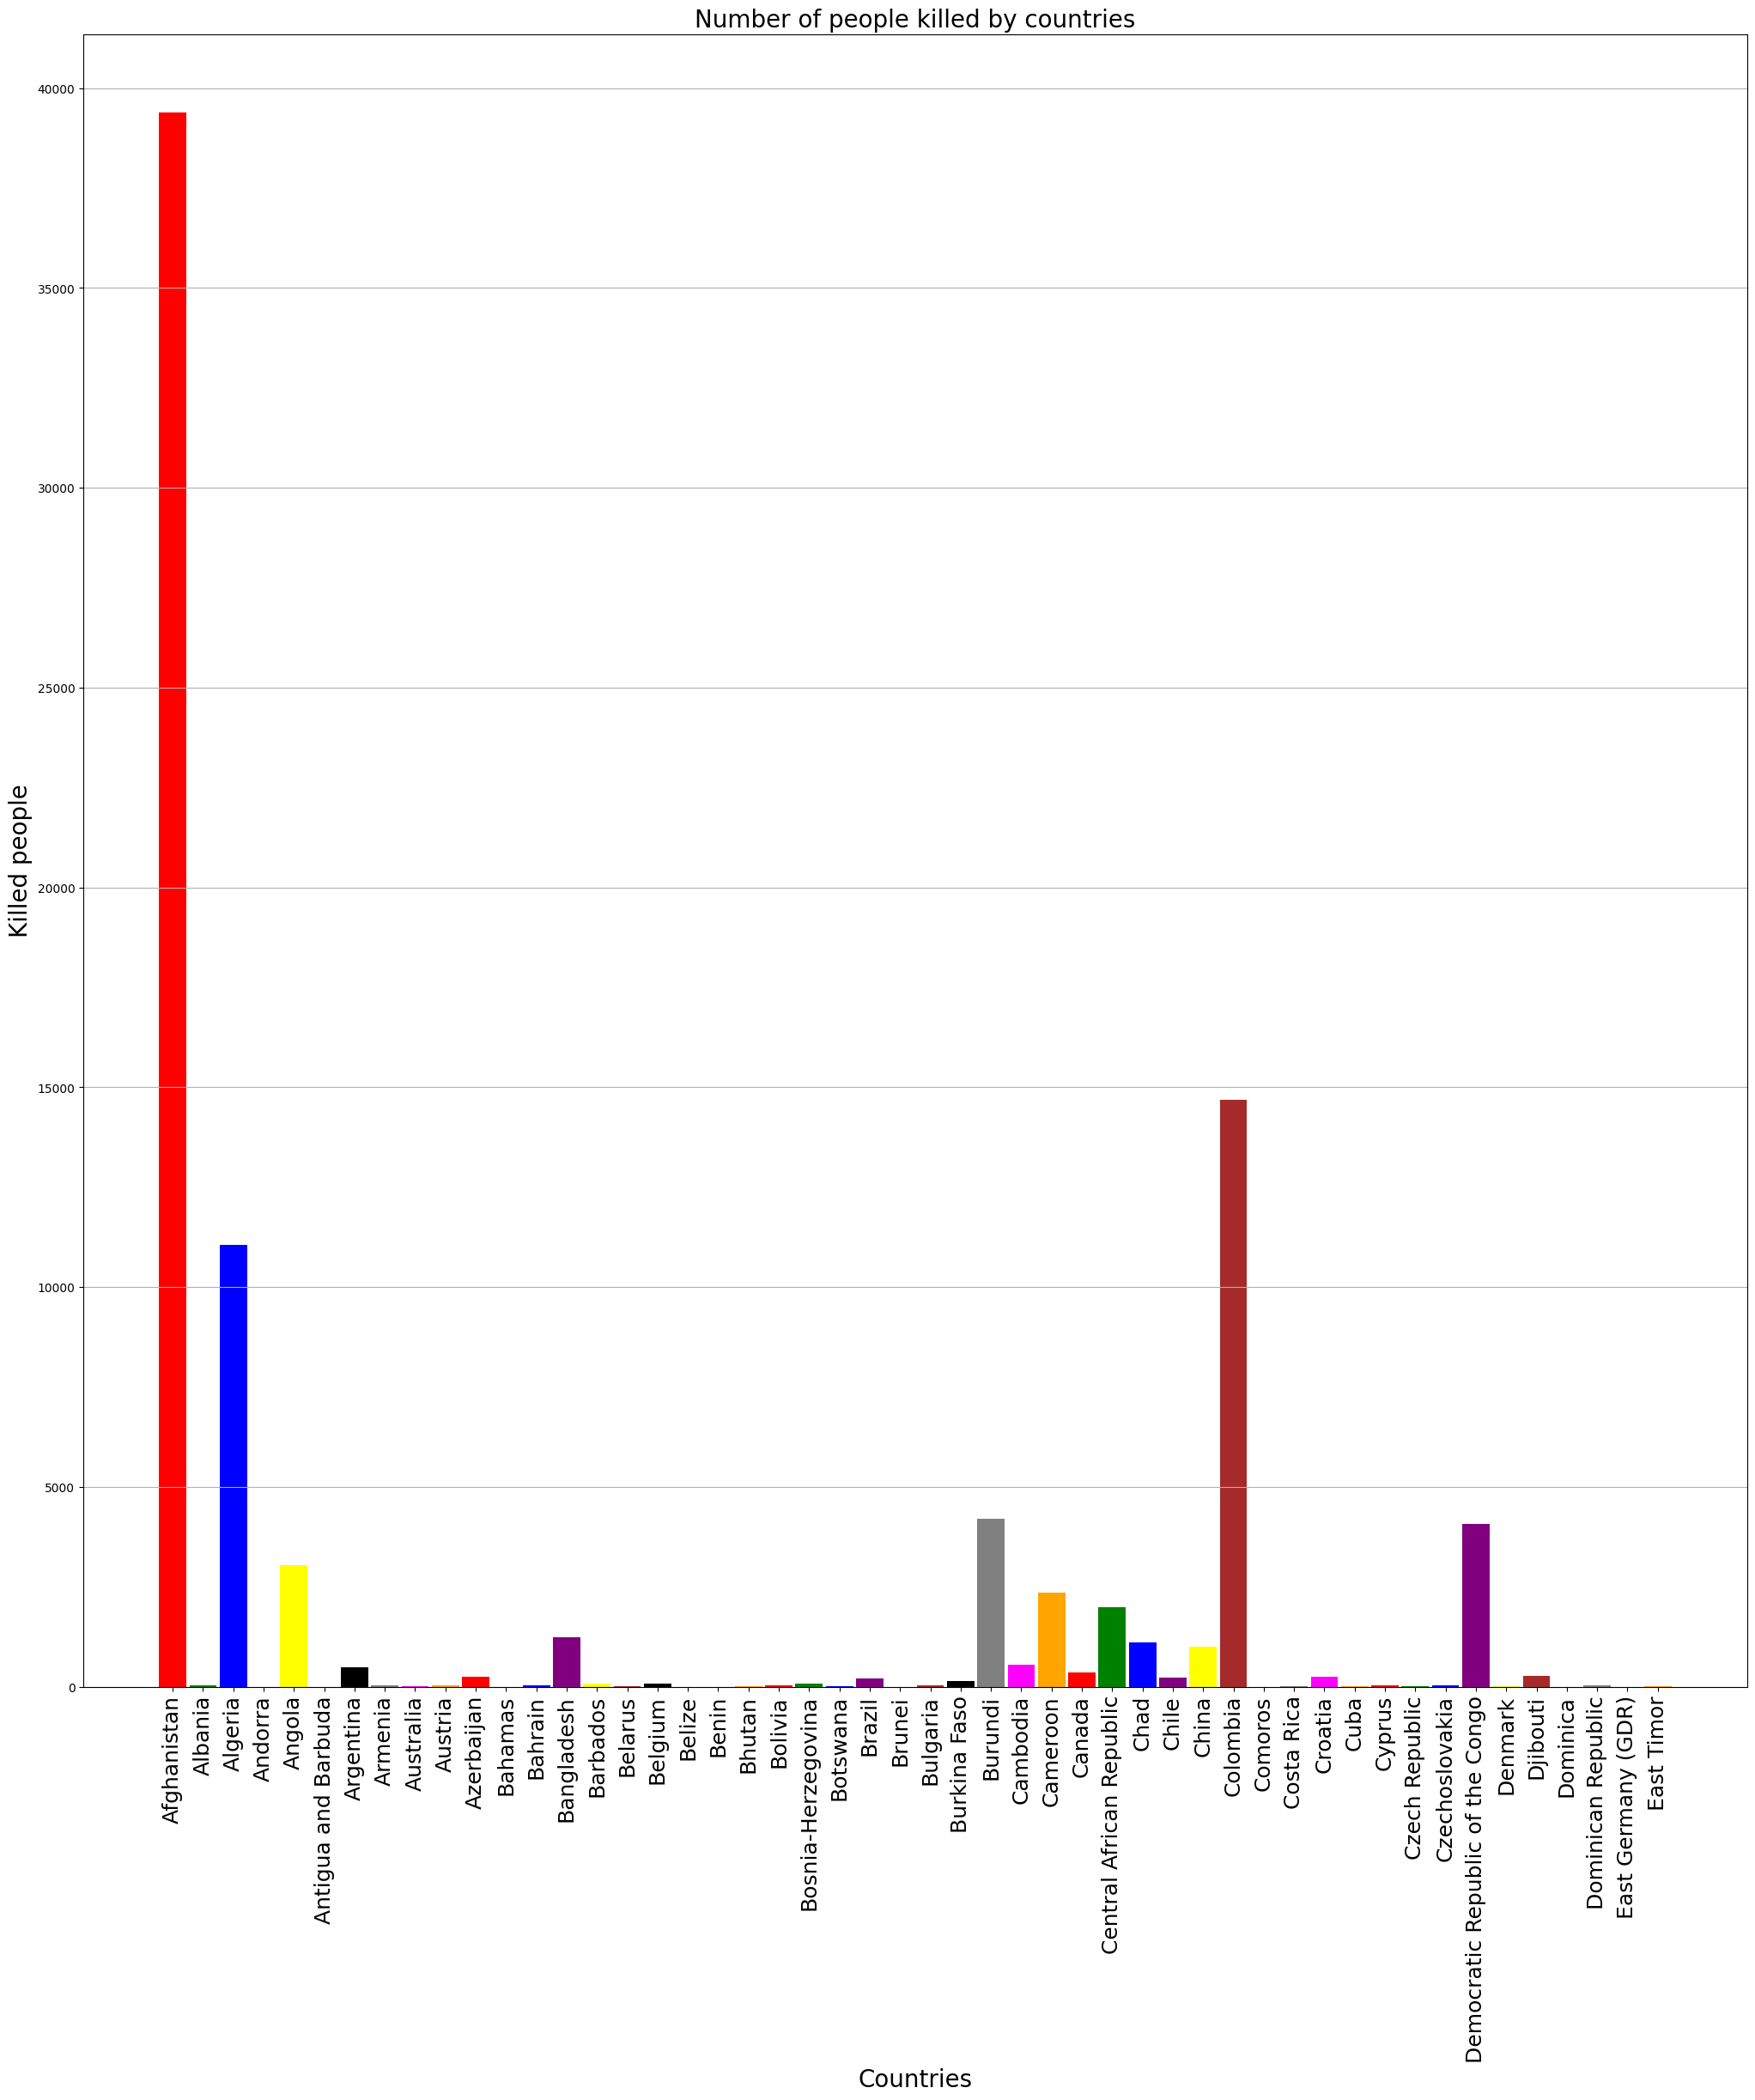

In [59]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50]
index = np.arange(len(labels))  # Corrected typo here
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 25
fig_size[1] = 25
plt.rcParams['figure.figsize'] = fig_size
plt.bar(index, values, color=colors, width=0.9)
plt.ylabel('Killed people', fontsize=20)
plt.xlabel('Countries', fontsize=20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize=20)
plt.show()


